# Using Tensorflow to predict values of a function, based on previous functions

**Authors:** Wladymir Brborich, Jean Karlo Obando, Miguel Guaño, Christopher Rojas

## Considerations

This project mostly an empirical aproach to aproximate function values, the base for the code and nn architecture where taken from this [article](https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877), whith this [repo](https://github.com/sebastianheinz/stockprediction), feel free to check them out

## Tools used

### Tensorflow

It is an open source library for machine learning, ideal to start coding and building your own neural networks, [more info](https://www.tensorflow.org/)

### Pandas

Pandas is the most popular data analysis tool on python, learn more [here](https://pandas.pydata.org/)

## Building the model

First we need to import our dependecies

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

We will use code from p5.js function map() to scale our data set

In [2]:
def translate(n, start1, stop1, start2, stop2):
    return ((n-start1)/(stop1-start1))*(stop2-start2)+start2

Then we create a dataset from an excel sheet with the values for training

In [3]:
data = pd.read_excel('training_data.xlsx', 'Training')
data.head()

,HORA,VALOR1,VALOR2,VALOR3,RESULT
0,10,10.0,10.0,11.0,11.0
1,11,10.2,8.0,10.2,9.0
2,12,10.3,8.5,10.3,8.0
3,13,10.2,10.2,10.2,9.0
4,15,9.5,9.5,8.9,8.9


Then for the values for predicting the function

In [4]:
data_testing = pd.read_excel('training_data.xlsx', 'Predicting')
data_testing.head()

,HORA,VALOR1,VALOR2,VALOR3
0,16,9.4,9.0,9.40
1,17,9.3,10.0,9.20
2,18,9.7,9.7,9.25
3,19,9.8,9.8,9.80
4,20,10.0,10.0,9.90


After we can separate our training and testing data, this is to evolve our neural network

In [5]:
n = data.shape[0]
data = data.values
testing_percentage = 0.9

train_start = 0
train_end = int(np.floor(testing_percentage*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

n = len(data_train[0])
print(n)

print(data_train)
print(data_test)

5
[[10.  10.  10.  11.  11. ]
 [11.  10.2  8.  10.2  9. ]
 [12.  10.3  8.5 10.3  8. ]
 [13.  10.2 10.2 10.2  9. ]
 [15.   9.5  9.5  8.9  8.9]]
[[14.   10.05 10.05  9.   11.  ]]


We also convert our testing data to the apropiate format

In [6]:
data_testing = data_testing.values
print(data_testing)

[[16.    9.4   9.    9.4 ]
 [17.    9.3  10.    9.2 ]
 [18.    9.7   9.7   9.25]
 [19.    9.8   9.8   9.8 ]
 [20.   10.   10.    9.9 ]]


We separate the input data, from the known answers or outputs, for each set

In [7]:
x_train = data_train[:, 0:n-1]
print('Training set')
print(x_train)
y_train = data_train[:, n-1]
print(y_train)
print('Testing set')
x_test = data_test[:, 0:n-1]
print(x_test)
y_test = data_test[:, n-1]
print(y_test)

Training set
[[10.  10.  10.  11. ]
 [11.  10.2  8.  10.2]
 [12.  10.3  8.5 10.3]
 [13.  10.2 10.2 10.2]
 [15.   9.5  9.5  8.9]]
[11.   9.   8.   9.   8.9]
Testing set
[[14.   10.05 10.05  9.  ]]
[11.]


We scale our sets to the range (-1, 1) so we can feed those data into the neural network

In [8]:
x_train = np.array([[translate(item,8, 20, -1, 1) for item in col] for col in x_train])
print(x_train)
y_train = np.array([translate(item,8, 20, -1, 1) for item in y_train])
print(y_train)

[[-0.66666667 -0.66666667 -0.66666667 -0.5       ]
 [-0.5        -0.63333333 -1.         -0.63333333]
 [-0.33333333 -0.61666667 -0.91666667 -0.61666667]
 [-0.16666667 -0.63333333 -0.63333333 -0.63333333]
 [ 0.16666667 -0.75       -0.75       -0.85      ]]
[-0.5        -0.83333333 -1.         -0.83333333 -0.85      ]


In [9]:
x_test = np.array([[translate(item,8, 20, -1, 1) for item in col] for col in x_test])
print(x_test)
y_test = np.array([translate(item,8, 20, -1, 1) for item in y_test])
print(y_test)

[[ 0.         -0.65833333 -0.65833333 -0.83333333]]
[-0.5]


In [10]:
data_pred = np.array([translate(item,8, 20, -1, 1) for item in data_testing])
print(data_pred)

[[ 0.33333333 -0.76666667 -0.83333333 -0.76666667]
 [ 0.5        -0.78333333 -0.66666667 -0.8       ]
 [ 0.66666667 -0.71666667 -0.71666667 -0.79166667]
 [ 0.83333333 -0.7        -0.7        -0.7       ]
 [ 1.         -0.66666667 -0.66666667 -0.68333333]]


We then define our neural network architecture, we use a lot of neurons with 4 layers to converge into a suitable prediction faster, with not to many itterations

In [11]:
n_prices = x_train.shape[1]
# Neurons
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

Then we declare our Tensorflow stuff, mainly our tensors, in which we pass the data arrays

In [37]:
net = tf.InteractiveSession()
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_prices])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

After that, we build the neural network

1. inicialize weights and biases

In [38]:
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

W_hidden_1 = tf.Variable(weight_initializer([n_prices, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

2.  inicialize output weights and biases

In [39]:
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

3. Create our hidden layers

In [40]:
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

4. Create the output layer

In [41]:
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

5. Create the cost function, optimazer, and initialize the network

In [42]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# Init
net.run(tf.global_variables_initializer())

Now we can train our model with our data

In [43]:
mse_train =[]
mse_test =[]

epochs = 100
while True:

    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    x_train = x_train[shuffle_indices]
    y_train = y_train[shuffle_indices]        
    net.run(opt, feed_dict={X: x_train, Y: y_train}) 
    mse_train.append(net.run(mse, feed_dict={X: x_train, Y: y_train}))
    mse_test.append(net.run(mse, feed_dict={X: x_test, Y: y_test}))
    print('MSE Test: ', mse_test[-1])
    epochs-=1
    if mse_test[-1]<0.01 or epochs == 0: break

MSE Test:  0.0635421
MSE Test:  0.00033747233


After training we can predict the values for the missing function data

In [44]:
pred = net.run(out, feed_dict={X: data_pred})
print('----test-data-----')
print(net.run(out, feed_dict={X: x_test}))
print('----pred-data-----')
print(pred)
print([translate(item,-1, 1, 8, 20) for item in pred])
net.close()

----test-data-----
[[-0.48162958]]
----pred-data-----
[[-0.51655495 -0.50085664 -0.5025829  -0.4816861  -0.4777368 ]]
[array([10.90067 , 10.99486 , 10.984503, 11.109883, 11.133579],
      dtype=float32)]


## Plotting the results

Here we can see a plot, with the previous functions, and the completed function based on that data

**Result data**

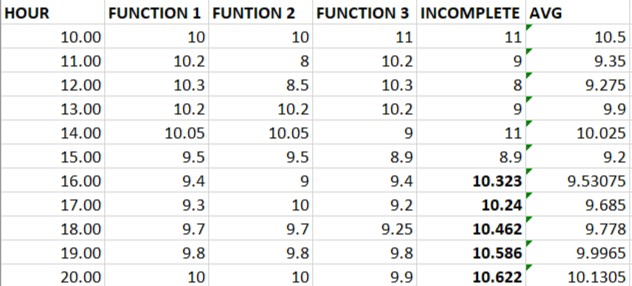

**Result graphic**

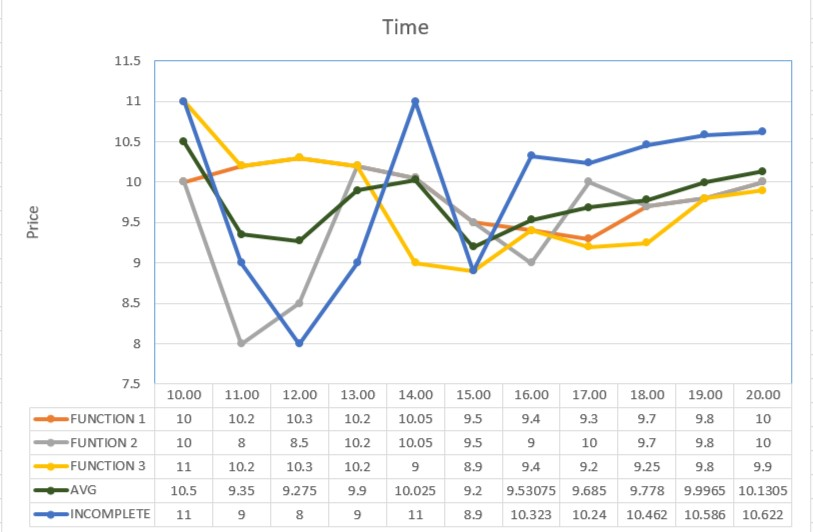

## Conclusions

After we have trained our neural network, and checked the output results for the incomplete function, we can clearly see, that the output is strongly influenced by the orignial known values, as this is a small sample, we dont have much training data, and the known data differs strongly from the prediction data.

If we scale our sample data set, and known functions, with a better sample, our predictions will be even more accurate.

As a final thought, the neural network serves it's purpose, it acts as an universal function approximator, so we can have values as close to reality as we can get.
